In [1]:
# required packages
import pandas as pd

In [3]:
# Load Data
prices_filename = 'Data/prices.csv'                             
prices = pd.read_csv(prices_filename)

In [6]:
# pick one ticker for now
apple = prices[prices['symbol'] =='AAPL']

In [7]:
# describe the numeric data
apple.describe()

,open,close,low,high,volume
count,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,313.076311,312.927066,309.828241,315.911288,9.422578e+07
std,185.299468,185.147104,183.383917,186.898177,6.020519e+07
min,90.000000,90.279999,89.470001,90.699997,1.147590e+07
25%,115.222498,115.190002,114.002500,116.362499,4.917478e+07
50%,318.230007,318.240008,316.545002,320.600008,8.050385e+07
75%,470.880017,472.592512,467.972513,478.110008,1.210816e+08
max,702.409988,702.100021,699.569977,705.070023,4.702495e+08


In [8]:
# check data types 
apple.dtypes
# change data to date type

date       object
symbol     object
open      float64
close     float64
low       float64
high      float64
volume    float64
dtype: object

In [11]:
# no nulls in this data set
apple.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [12]:
apple['date'] = pd.to_datetime(apple['date'])

C:\Users\GeorgiannaJames\AppData\Local\Temp\ipykernel_3816\1988685929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple['date'] = pd.to_datetime(apple['date'])


In [14]:
apple.dtypes
apple.head()


,date,symbol,open,close,low,high,volume
254,2010-01-04,AAPL,213.429998,214.009998,212.380001,214.499996,123432400.0
721,2010-01-05,AAPL,214.599998,214.379993,213.249994,215.589994,150476200.0
1189,2010-01-06,AAPL,214.379993,210.969995,210.750004,215.230000,138040000.0
1657,2010-01-07,AAPL,211.750000,210.580000,209.050005,212.000006,119282800.0
2125,2010-01-08,AAPL,210.299994,211.980005,209.060005,212.000006,111902700.0


In [19]:
apple['next_day_close'] = apple.sort_values(by=['date'], ascending=True).close.shift(-1)

C:\Users\GeorgiannaJames\AppData\Local\Temp\ipykernel_3816\3736901811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple['next_day_close'] = apple.sort_values(by=['date'], ascending=True).close.shift(-1)


In [39]:
apple.corr()

,open,close,low,high,volume,next_day_close
open,1.000000,0.999649,0.999809,0.999866,0.410195,0.996516
close,0.999649,1.000000,0.999834,0.999852,0.408169,0.996900
low,0.999809,0.999834,1.000000,0.999793,0.402363,0.996685
high,0.999866,0.999852,0.999793,1.000000,0.414028,0.996765
volume,0.410195,0.408169,0.402363,0.414028,1.000000,0.409008
next_day_close,0.996516,0.996900,0.996685,0.996765,0.409008,1.000000


In [29]:
apple = apple.dropna()

In [30]:
from sklearn.model_selection import train_test_split

apple_train, apple_test = train_test_split(apple, test_size=0.2, random_state=0)

features = ['open', 'close', 'low', 'high', 'volume']

X_train = apple_train[features]
y_train = apple_train['next_day_close']

X_test = apple_test[features]
y_test = apple_test['next_day_close']

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# fit the model

model = LinearRegression()
model.fit(X_train, y_train)

# predict

y_pred = model.predict(X_test)

# Evaluate the Model Performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
n = len(y_train)
p = len(features)
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)

print(f'MSE (test): {mse:.4f}')
print(f'RMSE (test): {mse**0.5:.4f}')
print(f'MAE (test): {mae:.4f}')
print(f'R-squared is: {r2}')
print(f'Adjusted R-squared is: {adj_r2}')


MSE (test): 49.1548
RMSE (test): 7.0110
MAE (test): 4.2386
R-squared is: 0.9986075140494802
Adjusted R-squared is: 0.9986025479797566


<function matplotlib.pyplot.show(close=None, block=None)>

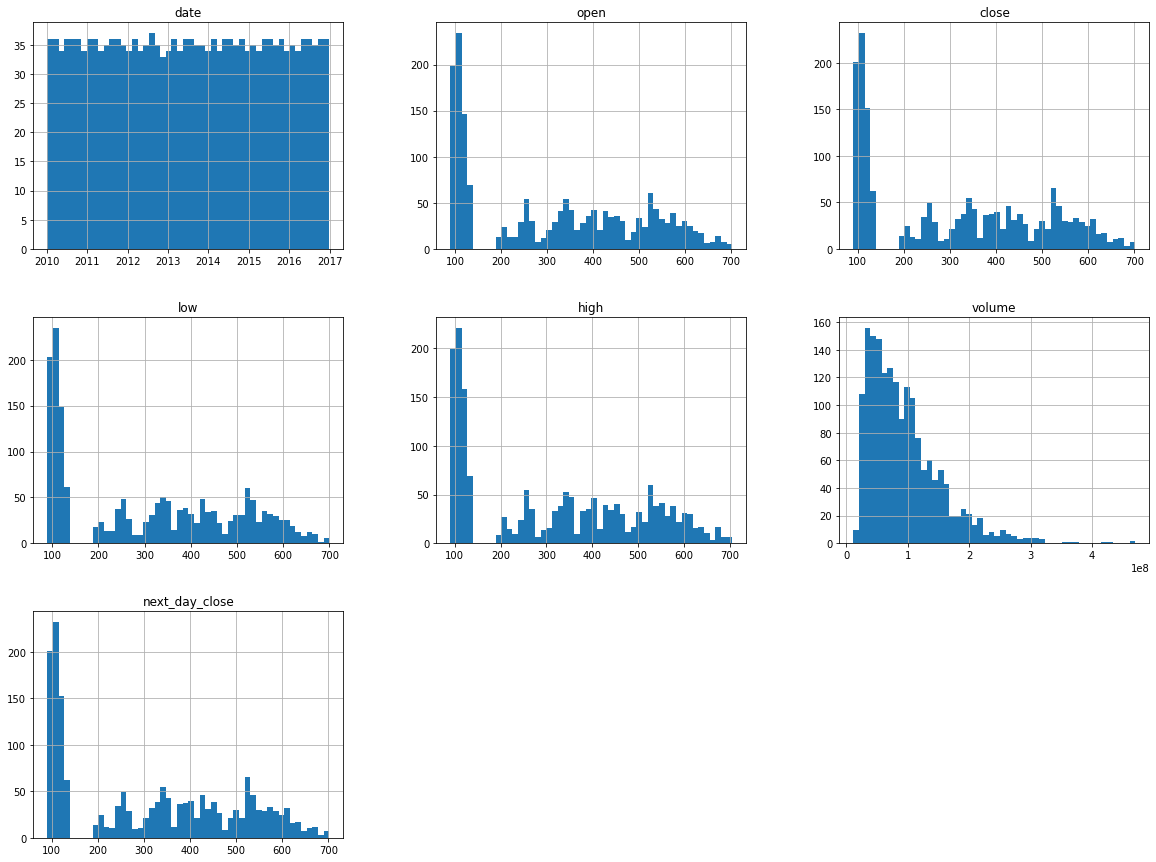

In [35]:
#Plot histograms of numerical data
%matplotlib inline
import matplotlib.pyplot as plt
apple.hist(bins = 50, figsize = (20,15))
plt.show

### Observations
* the price data is multi-modal 
* volumne is unimodel but skewed to the left 

Text(0.5, 1.0, 'Close price over time')

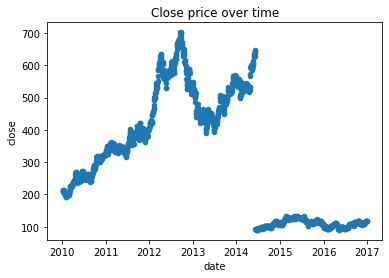

In [38]:
# lets plot a price against time to see why the prices are mutli-modal
plt = apple.plot(kind = 'scatter', x = "date", y = "close")
plt.set_title("Close price over time")

### observations
* AAPL must have split their stock in 2014

In [48]:
# Load Data
prices_adj_filename = 'Data/prices-split-adjusted.csv'                             
prices_adj = pd.read_csv(prices_adj_filename)

In [49]:
apple_prices_adj = prices_adj[prices_adj['symbol'] == 'AAPL']

Text(0.5, 1.0, 'Close price over time')

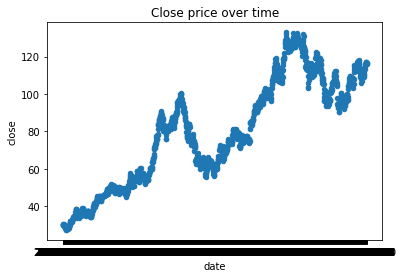

In [50]:
# lets plot a price against time to see why the prices are mutli-modal
plt = apple_prices_adj.plot(kind = 'scatter', x = "date", y = "close")
plt.set_title("Close price over time")

In [51]:
apple_prices_adj['date'] = pd.to_datetime(apple_prices_adj['date'])
apple_prices_adj['next_day_close'] = apple_prices_adj.sort_values(by=['date'], ascending=True).close.shift(-1)

C:\Users\GeorgiannaJames\AppData\Local\Temp\ipykernel_3816\2622051081.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_prices_adj['date'] = pd.to_datetime(apple_prices_adj['date'])
C:\Users\GeorgiannaJames\AppData\Local\Temp\ipykernel_3816\2622051081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_prices_adj['next_day_close'] = apple_prices_adj.sort_values(by=['date'], ascending=True).close.shift(-1)


In [52]:
apple_prices_adj = apple_prices_adj.dropna()

In [53]:
apple_prices_adj.head()

,date,symbol,open,close,low,high,volume,next_day_close
254,2010-01-04,AAPL,30.490000,30.572857,30.340000,30.642857,123432400.0,30.625713
721,2010-01-05,AAPL,30.657143,30.625713,30.464285,30.798571,150476200.0,30.138571
1189,2010-01-06,AAPL,30.625713,30.138571,30.107143,30.747143,138040000.0,30.082857
1657,2010-01-07,AAPL,30.250000,30.082857,29.864286,30.285715,119282800.0,30.282858
2125,2010-01-08,AAPL,30.042856,30.282858,29.865715,30.285715,111902700.0,30.015715


In [54]:
from sklearn.model_selection import train_test_split

apple_train, apple_test = train_test_split(apple_prices_adj, test_size=0.2, random_state=0)

features = ['open', 'close', 'low', 'high', 'volume']

X_train = apple_train[features]
y_train = apple_train['next_day_close']

X_test = apple_test[features]
y_test = apple_test['next_day_close']

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# fit the model

model = LinearRegression()
model.fit(X_train, y_train)

# predict

y_pred = model.predict(X_test)

# Evaluate the Model Performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
n = len(y_train)
p = len(features)
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)

print(f'MSE (test): {mse:.4f}')
print(f'RMSE (test): {mse**0.5:.4f}')
print(f'MAE (test): {mae:.4f}')
print(f'R-squared is: {r2}')
print(f'Adjusted R-squared is: {adj_r2}')


MSE (test): 1.7263
RMSE (test): 1.3139
MAE (test): 0.9213
R-squared is: 0.997833733674032
Adjusted R-squared is: 0.9978260080451948


### Observations

* Using adjusted pricing seems to have improved the model
* RMSE went down significantly, adj R2 stayed relatively the same 

### Additional Feature Engineering 
* predicting the next day's close price based on today's price movement is generating pretty strong results, however, there might be other variables that explain the next day's close price
* A few additional features:
  * Season variable 
  * Month variable
  * Day of the week variable 
  * Normalized trading volume 

In [55]:
#feature engineering 
# month variable
apple_prices_adj['month'] = pd.to_datetime(apple_prices_adj['date']).dt.month 

C:\Users\GeorgiannaJames\AppData\Local\Temp\ipykernel_3816\462610546.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_prices_adj['month'] = pd.to_datetime(apple_prices_adj['date']).dt.month


In [58]:
# season variable
# winter = 1, spring = 2, summer = 3, fall = 4
season_dict = {1:1, 2:1, 3:2, 4:2, 5:2, 6:3, 7:3, 8:3, 9:4, 10:4, 11:4, 12:1}

apple_prices_adj['season'] = apple_prices_adj['month'].apply(lambda x : season_dict[x])


C:\Users\GeorgiannaJames\AppData\Local\Temp\ipykernel_3816\1242637894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_prices_adj['season'] = apple_prices_adj['month'].apply(lambda x : season_dict[x])


In [66]:
# DOW variable

apple_prices_adj['dow'] = apple_prices_adj['date'].dt.weekday

In [68]:
# normalize volume
apple_prices_adj['volume'] = (apple_prices_adj['volume']-apple_prices_adj['volume'].min())/(apple_prices_adj['volume'].max()-apple_prices_adj['volume'].min())


In [69]:
apple_prices_adj.head(
)

,date,symbol,open,close,low,high,volume,next_day_close,month,season,dow
254,2010-01-04,AAPL,30.490000,30.572857,30.340000,30.642857,0.244034,30.625713,1,1,0
721,2010-01-05,AAPL,30.657143,30.625713,30.464285,30.798571,0.302982,30.138571,1,1,1
1189,2010-01-06,AAPL,30.625713,30.138571,30.107143,30.747143,0.275875,30.082857,1,1,2
1657,2010-01-07,AAPL,30.250000,30.082857,29.864286,30.285715,0.234989,30.282858,1,1,3
2125,2010-01-08,AAPL,30.042856,30.282858,29.865715,30.285715,0.218903,30.015715,1,1,4


In [70]:
from sklearn.model_selection import train_test_split

apple_train, apple_test = train_test_split(apple_prices_adj, test_size=0.2, random_state=0)

features = ['open', 'close', 'low', 'high', 'volume', 'month', 'season', 'dow']

X_train = apple_train[features]
y_train = apple_train['next_day_close']

X_test = apple_test[features]
y_test = apple_test['next_day_close']

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# fit the model

model = LinearRegression()
model.fit(X_train, y_train)

# predict

y_pred = model.predict(X_test)

# Evaluate the Model Performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
n = len(y_train)
p = len(features)
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)

print(f'MSE (test): {mse:.4f}')
print(f'RMSE (test): {mse**0.5:.4f}')
print(f'MAE (test): {mae:.4f}')
print(f'R-squared is: {r2}')
print(f'Adjusted R-squared is: {adj_r2}')


MSE (test): 1.7187
RMSE (test): 1.3110
MAE (test): 0.9164
R-squared is: 0.9978432995935045
Adjusted R-squared is: 0.9978309667820306


### Observations ...
* this feature engineering looks to have improved the model very slightly
* let's try some other models 

In [85]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

def regressor(inp_dim):
    
    model = Sequential()
    
    model.add(Dense(20, input_dim=inp_dim, kernel_initializer='normal', activation='relu', kernel_regularizer= tf.keras.regularizers.l2(0.1)))
    model.add(Dense(25, kernel_initializer='normal', activation='relu', kernel_regularizer= tf.keras.regularizers.l2(0.1)))
    model.add(Dense(10, kernel_initializer='normal', activation='relu', kernel_regularizer= tf.keras.regularizers.l2(0.1)))
    model.add(Dense(1, activation='relu', kernel_initializer='normal'))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [86]:
model_2 = regressor(inp_dim=8)
model_2.fit(X_train, y_train, epochs=70, validation_split=0.2)

Epoch 1/70
36/36 [==============================] - 1s 9ms/step - loss: 7164.4985 - val_loss: 6591.0840
Epoch 2/70
36/36 [==============================] - 0s 2ms/step - loss: 6316.0713 - val_loss: 4353.8003
Epoch 3/70
36/36 [==============================] - 0s 2ms/step - loss: 1838.5071 - val_loss: 49.7704
Epoch 4/70
36/36 [==============================] - 0s 2ms/step - loss: 38.3981 - val_loss: 7.2254
Epoch 5/70
36/36 [==============================] - 0s 2ms/step - loss: 4.3614 - val_loss: 3.6647
Epoch 6/70
36/36 [==============================] - 0s 2ms/step - loss: 3.8304 - val_loss: 3.6177
Epoch 7/70
36/36 [==============================] - 0s 2ms/step - loss: 3.7261 - val_loss: 3.5369
Epoch 8/70
36/36 [==============================] - 0s 2ms/step - loss: 3.5764 - val_loss: 3.3862
Epoch 9/70
36/36 [==============================] - 0s 2ms/step - loss: 3.3014 - val_loss: 3.1743
Epoch 10/70
36/36 [==============================] - 0s 2ms/step - loss: 3.1027 - val_loss: 3.1356
Ep

In [87]:
y_pred_2 = model_2.predict(X_test)

12/12 [==============================] - 0s 742us/step


In [88]:

# Evaluate the Model Performance
mse = mean_squared_error(y_test, y_pred_2)
mae = mean_absolute_error(y_test,y_pred_2)
r2 = r2_score(y_test, y_pred_2)
n = len(y_train)
p = len(features)
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)

print(f'MSE (test): {mse:.4f}')
print(f'RMSE (test): {mse**0.5:.4f}')
print(f'MAE (test): {mae:.4f}')
print(f'R-squared is: {r2}')
print(f'Adjusted R-squared is: {adj_r2}')

MSE (test): 2.0953
RMSE (test): 1.4475
MAE (test): 1.0367
R-squared is: 0.9973707098257105
Adjusted R-squared is: 0.9973556745709612


In [89]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


xg_reg = xgb.XGBRegressor(learning_rate = 0.1, max_depth = 4, n_estimators = 150)
xg_reg.fit(X_train, y_train)
y_pred = xg_reg.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE (test): {mse:.4f}')
print(f'RMSE (test): {mse**0.5:.4f}')
print(f'MAE (test): {mae:.4f}')
print(f'R-squared is: {r2}')

MSE (test): 2.1297
RMSE (test): 1.4594
MAE (test): 1.0573
R-squared is: 0.997327449473813


In [90]:
# Write your code here

# Write your code here

# Define a function that automates the search for optimal hyperparameter values
def hyper_tuning(X_train, y_train, X_test, y_test, est_list, depth_list, rate_list):
    data = []
    for depth in depth_list:
        for estimate in est_list:
            for rate in rate_list:
                inner_dict = {}
                inner_dict['depth'] = depth
                xg_reg = xgb.XGBRegressor(learning_rate = rate, max_depth = depth, n_estimators = estimate)
                xg_reg.fit(X_train, y_train)
                y_pred = xg_reg.predict(X_test)
                
                mse = mean_squared_error(y_test, y_pred)
                rmse = mse**0.5
                mae = mean_absolute_error(y_test,y_pred)
                r2 = r2_score(y_test, y_pred)
                
                inner_dict['n_estimate'] = estimate
                inner_dict['rate'] = rate
                inner_dict['mse'] = mse
                inner_dict['rmse'] = rmse
                inner_dict['r2'] = r2
                data.append(inner_dict)
            
    summary_df = pd.DataFrame(data)
    summary_df.sort_values('rmse', inplace = True)
    return summary_df

In [91]:
# Call the function and pass values for the expected arguments
depth_list = [1,2,3,4,5,6,7,8,9,10]
est_list = [30,40,50,60,70,80,90,100,110,125,150,200,250]
rate_list = [ 0.1]

hyper_tuning(X_train, y_train, X_test, y_test, est_list, depth_list, rate_list).head()

,depth,n_estimate,rate,mse,rmse,r2
33,3,100,0.1,2.029218,1.424506,0.997454
30,3,70,0.1,2.030915,1.425102,0.997451
32,3,90,0.1,2.030949,1.425114,0.997451
31,3,80,0.1,2.031082,1.425160,0.997451
34,3,110,0.1,2.032808,1.425766,0.997449


In [96]:
apple_prices_adj['date'].max()

Timestamp('2016-12-29 00:00:00')

### Conclusion
* the model with the lowest RMSE was the linear regression after feature engineering
* all of the models have adj r2 values around .997
* would it work on out of sample data?

In [97]:
from yahoofinancials import YahooFinancials

companies = ['AAPL'] # Getting the stock prices for Apple

yf = YahooFinancials(companies)
stock_prices = yf.get_historical_price_data('2016-12-29', '2018-01-01',  'daily')

In [98]:
stock_prices['AAPL']['prices']

[{'date': 1483021800,
  'high': 29.27750015258789,
  'low': 29.100000381469727,
  'open': 29.112499237060547,
  'close': 29.1825008392334,
  'volume': 60158000,
  'adjclose': 27.310453414916992,
  'formatted_date': '2016-12-29'},
 {'date': 1483108200,
  'high': 29.299999237060547,
  'low': 28.857500076293945,
  'open': 29.162500381469727,
  'close': 28.954999923706055,
  'volume': 122345200,
  'adjclose': 27.097549438476562,
  'formatted_date': '2016-12-30'},
 {'date': 1483453800,
  'high': 29.082500457763672,
  'low': 28.690000534057617,
  'open': 28.950000762939453,
  'close': 29.037500381469727,
  'volume': 115127600,
  'adjclose': 27.174755096435547,
  'formatted_date': '2017-01-03'},
 {'date': 1483540200,
  'high': 29.127500534057617,
  'low': 28.9375,
  'open': 28.962499618530273,
  'close': 29.0049991607666,
  'volume': 84472400,
  'adjclose': 27.14434051513672,
  'formatted_date': '2017-01-04'},
 {'date': 1483626600,
  'high': 29.21500015258789,
  'low': 28.952499389648438,
  '

In [99]:
df = pd.DataFrame(stock_prices['AAPL']['prices'])

In [101]:
new_apple = df.drop(columns=['date', 'close'])

In [103]:
new_apple = new_apple.rename(columns={'formatted_date':'date'})

In [105]:
new_apple['date'] = pd.to_datetime(new_apple['date'])

In [108]:
new_apple = new_apple.rename(columns={'adjclose':'close'})

In [109]:
new_apple['next_day_close'] = new_apple.sort_values(by=['date'], ascending=True).close.shift(-1)

In [110]:
new_apple.head()

,high,low,open,volume,close,date,next_day_close
0,29.277500,29.100000,29.112499,60158000,27.310453,2016-12-29,27.097549
1,29.299999,28.857500,29.162500,122345200,27.097549,2016-12-30,27.174755
2,29.082500,28.690001,28.950001,115127600,27.174755,2017-01-03,27.144341
3,29.127501,28.937500,28.962500,84472400,27.144341,2017-01-04,27.282377
4,29.215000,28.952499,28.980000,88774400,27.282377,2017-01-05,27.586531


In [111]:
new_apple['month'] = pd.to_datetime(new_apple['date']).dt.month 
# season variable
# winter = 1, spring = 2, summer = 3, fall = 4
season_dict = {1:1, 2:1, 3:2, 4:2, 5:2, 6:3, 7:3, 8:3, 9:4, 10:4, 11:4, 12:1}

new_apple['season'] = new_apple['month'].apply(lambda x : season_dict[x])

# DOW variable

new_apple['dow'] = new_apple['date'].dt.weekday

# normalize volume
new_apple['volume'] = (new_apple['volume']-new_apple['volume'].min())/(new_apple['volume'].max()-new_apple['volume'].min())

new_apple = new_apple.dropna()


In [112]:
new_apple.head()

,high,low,open,volume,close,date,next_day_close,month,season,dow
0,29.277500,29.100000,29.112499,0.010339,27.310453,2016-12-29,27.097549,12,1,3
1,29.299999,28.857500,29.162500,0.169047,27.097549,2016-12-30,27.174755,12,1,4
2,29.082500,28.690001,28.950001,0.150627,27.174755,2017-01-03,27.144341,1,1,1
3,29.127501,28.937500,28.962500,0.072392,27.144341,2017-01-04,27.282377,1,1,2
4,29.215000,28.952499,28.980000,0.083371,27.282377,2017-01-05,27.586531,1,1,3


In [113]:
from sklearn.model_selection import train_test_split


X_train = apple_prices_adj[features]
y_train = apple_prices_adj['next_day_close']

X_test = new_apple[features]
y_test = new_apple['next_day_close']

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# fit the model

model = LinearRegression()
model.fit(X_train, y_train)

# predict

y_pred = model.predict(X_test)

# Evaluate the Model Performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
n = len(y_train)
p = len(features)
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)

print(f'MSE (test): {mse:.4f}')
print(f'RMSE (test): {mse**0.5:.4f}')
print(f'MAE (test): {mae:.4f}')
print(f'R-squared is: {r2}')
print(f'Adjusted R-squared is: {adj_r2}')


MSE (test): 0.3674
RMSE (test): 0.6061
MAE (test): 0.5084
R-squared is: 0.9721437219145386
Adjusted R-squared is: 0.97201652429771


# Observations
* it works well on the newer AAPL data!